In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coffee = pd.read_csv('psd_coffee.csv')
coffee.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Which countries are included in the dataset?
coffee['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Ethiopia',
       'European Union', 'Gabon', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo', 'Laos', 'Liberia', 'Madagascar',
       'Malawi', 'Malaysia', 'Mexico', 'Montenegro', 'Morocco',
       'New Caledonia', 'New Zealand', 'Nicaragua', 'Nigeria',
       'North Macedonia', 'Norway', 'Panama', 'Papua New Guinea',
       'Paraguay', 'Peru', 'Philippines', 'Russia', 'Rwanda',
       'Saudi Arabia', 'Se

1- How much coffee did each country produce in the last 30 years? 
Next, figure out top 10 countries in production.

In [4]:
# subset dataset from 1993 to 2023
thirty_years = coffee[coffee['Year'] > 1992]

# group 'production' column
df = thirty_years.groupby('Country')['Production'].sum().reset_index()

# top 10 countries
df.sort_values(by=['Production'], ascending=False).head(10)

,Country,Production
9,Brazil,1425100
89,Vietnam,590383
16,Colombia,359961
39,Indonesia,277510
28,Ethiopia,168963
38,India,149130
53,Mexico,130318
37,Honduras,128403
83,Uganda,120416
33,Guatemala,117974


2- Which countries have production value that is not zero? Find the total number.

In [5]:
# subset values that are non-zero
not_zero = df[df['Production'] != 0]

print(f'Producers: {len(not_zero)} \n Non-producers: {len(df)- len(not_zero)}')

Producers: 57 
 Non-producers: 37


3- How did the total production grow in the last 30 years? Plot the data.

([<matplotlib.axis.XTick at 0x7f1e60813438>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

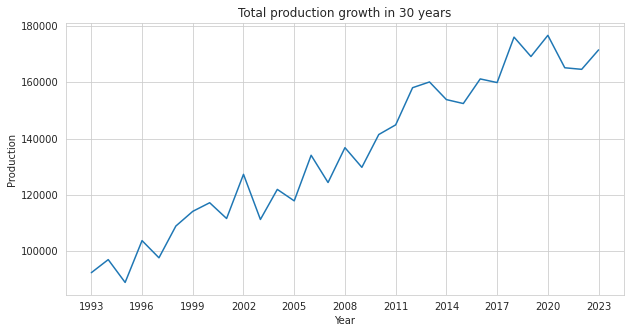

In [6]:
# set the style
sns.set_style('whitegrid')

# set figure size
plt.figure(figsize=(10,5))

sns.lineplot(data=thirty_years.groupby('Year')['Production'].sum().reset_index(), 
            x='Year', y='Production'
            ).set(title='Total production growth in 30 years')

plt.xticks(np.linspace(1993, 2023, 11))

In [7]:
# How correlated is total consuption with total production?

4- What percentage of total production is exported?

In [8]:
total_production = thirty_years['Production'].sum()
total_export = thirty_years['Exports'].sum()

total_export / total_production  * 100

80.8921874164547

5- Plot the relational graph of export and consumption.

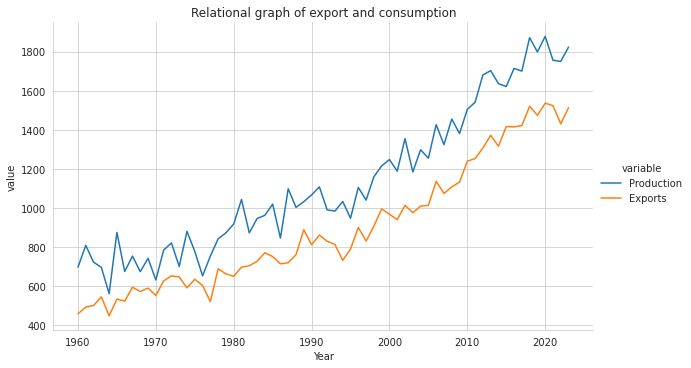

In [9]:
# group data by year and get mean values from Production and Exports columns
all_years = coffee.groupby('Year')[['Production', 'Exports']].mean().reset_index()

sns.relplot(data=pd.melt(all_years, ['Year']), x='Year', y='value', hue='variable',
            kind='line', aspect=1.7, height=5
           ).set(title='Relational graph of export and consumption')

 In the graph, we see the trends of the lines are smilar to each other.
Production line tends to have deeper declines and rises than exports line.

6- In order to see the relation between Production and Exports from another way, create a plot of differences in the means of production and export for decades.

In [10]:
# add 'bins' column to dataset to set bin ranges to decades in the bar plot above
coffee['bins'] = pd.cut(x=coffee['Year'], 
                               bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023])

# group dataset by 'bins' and get mean values of 'Production' and 'Exports' columns
prod_exp = coffee.groupby('bins')[['Production', 'Exports']].mean().reset_index()

# get the differences in the means of production and export for decades
prod_exp['diff_in_means'] = prod_exp['Production'] - prod_exp['Exports']

prod_exp.head()

,bins,Production,Exports,diff_in_means
0,"(1960, 1970]",712.445745,533.357447,179.088298
1,"(1970, 1980]",798.914894,626.057447,172.857447
2,"(1980, 1990]",987.987234,753.011702,234.975532
3,"(1990, 2000]",1082.153191,861.390426,220.762766
4,"(2000, 2010]",1336.595745,1063.335106,273.260638


[Text(0.5, 1.0, 'Differences in the means of production and export for decades'),
 Text(0.5, 0, 'decades'),
 Text(0, 0.5, 'difference in means')]

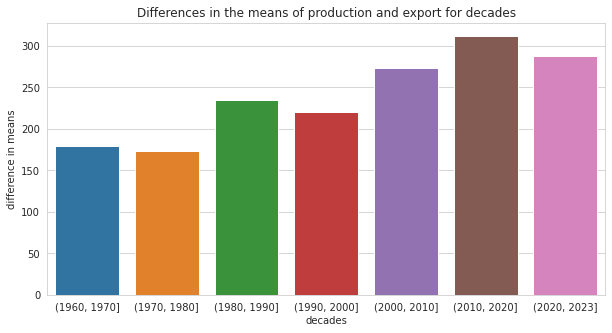

In [11]:
# set the figure size
plt.figure(figsize=(10,5))

sns.barplot(data=prod_exp, 
            x='bins', y='diff_in_means'
           ).set(title='Differences in the means of production and export for decades',
            xlabel='decades', 
            ylabel='difference in means')

As seen, in recent years the difference between production and exports has risen. Since we took these numbers by subtracting production from export, it worths to mention that it does not give information about production/export growth or contraction.